## Lab 5 - Using link functions to create generalized linear models

In [43]:
from cmdstanpy import CmdStanModel


import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [44]:
d = pd.read_csv("Airline_data.csv", sep=',', header=0)
d.head(10)

,Year,Fatal accidents,Passenger deaths,Miles flown [100 mln miles]
0,1976,24,734,3863.0
1,1977,25,516,4300.0
2,1978,31,754,5027.0
3,1979,31,877,5481.0
4,1980,22,814,5814.0
5,1981,21,362,6033.0
6,1982,26,764,5877.0
7,1983,20,809,6223.0
8,1984,16,223,7433.0
9,1985,22,1066,7107.0


In [45]:
miles_mean = d['Miles flown [100 mln miles]'].mean()
print("Miles mean: ", miles_mean)
miles_std = d['Miles flown [100 mln miles]'].std()
print("\nMiles std: ", miles_std)

Miles mean:  5715.8

Miles std:  1117.767795404951


### Prior predictive checks

In [46]:
model_ppc=CmdStanModel(stan_file='model_1_ppc.stan')

INFO:cmdstanpy:compiling stan file /home/Lab 5/model_1_ppc.stan to exe file /home/Lab 5/model_1_ppc
INFO:cmdstanpy:compiled model executable: /home/Lab 5/model_1_ppc


In [47]:
R = 1000
sim=model_ppc.sample(fixed_param=True, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains = 1)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [48]:
samples_df = sim.draws_pd()
samples_df

,lp__,accept_stat__,alpha,theta,n,lambda,y_i
0,0.0,0.0,0.634604,0.000517,6626.34,57.83380,62.0
1,0.0,0.0,0.492170,0.000444,4367.48,11.35260,11.0
2,0.0,0.0,0.778372,0.000446,4082.35,13.42450,10.0
3,0.0,0.0,0.846258,0.000524,4230.36,21.41690,19.0
4,0.0,0.0,0.812193,0.000591,6740.98,121.30800,117.0
...,...,...,...,...,...,...,...
995,0.0,0.0,0.909310,0.000485,6568.06,59.95580,75.0
996,0.0,0.0,0.529092,0.000526,4609.04,19.19420,20.0
997,0.0,0.0,0.300824,0.000489,3706.85,8.27622,7.0
998,0.0,0.0,0.777750,0.000460,6712.68,47.77280,54.0


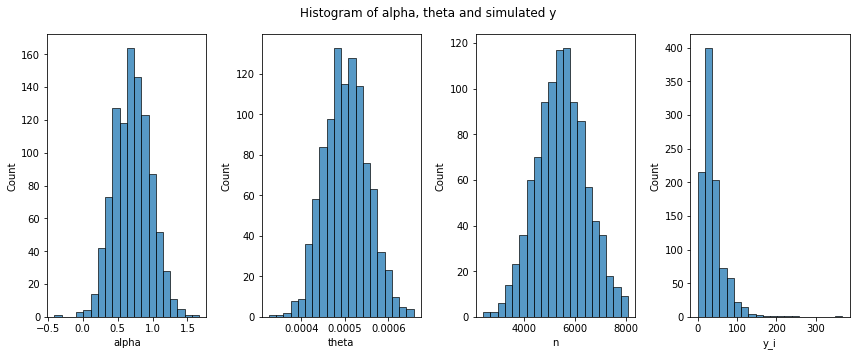

In [49]:
# Plot histograms of alpha, theta and simulated y.
fig, axs = plt.subplots(1,4, figsize=(12,5))
fig.suptitle("Histogram of alpha, theta and simulated y")
sns.histplot(data=samples_df, x="alpha", bins=20, ax=axs[0])
sns.histplot(data=samples_df, x="theta", bins=20, ax=axs[1])
sns.histplot(data=samples_df, x="n", bins=20, ax=axs[2])
sns.histplot(data=samples_df, x="y_i", bins=20, ax=axs[3])
plt.tight_layout()
plt.show()

In [50]:
# Check if samples are consistent with priors
alpha = samples_df["alpha"]
print("Alpha\nmean: ", alpha.mean(), " \nstd: ", alpha.std())

theta = samples_df["theta"]
print("\nTheta\nmean: ", theta.mean(), " \nstd: ", theta.std())

accidents = samples_df["y_i"]
print("\nNumber of accidents\nmean: ", accidents.mean(), " \nstd: ", accidents.std())

Alpha
mean:  0.709040884148  
std:  0.25916785864252784

Theta
mean:  0.000502219685  
std:  5.003210601601909e-05

Number of accidents
mean:  38.494  
std:  29.96668093009244


Task 2. Model fit and evaluation

In [51]:
model_1_fit = CmdStanModel(stan_file='model_1_fit.stan')

INFO:cmdstanpy:compiling stan file /home/Lab 5/model_1_fit.stan to exe file /home/Lab 5/model_1_fit
INFO:cmdstanpy:compiled model executable: /home/Lab 5/model_1_fit
--- Translating Stan model to C++ code ---
bin/stanc  --o=/tmp/tmpk8mbqgpy/tmpx9dajnf4.hpp /tmp/tmpk8mbqgpy/tmpx9dajnf4.stan
Warning in '/tmp/tmpk8mbqgpy/tmpx9dajnf4.stan', line 4, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.3.9 -I stan/lib/stan_math/lib/boost_1.75.0 -I stan/lib/stan_math/lib/sundials_6.0.0/include -I stan/lib

In [52]:
fit=model_1_fit.sample(data=dict(N=len(d),n=d['Miles flown [100 mln miles]'].values,y=d['Fatal accidents'].values), seed=28052020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▍         | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |█▎        | 00:02 Iteration:  100 / 2000 [  5%]  (Warmup)

chain 1 |█▊        | 00:03 Iteration:  200 / 2000 [ 10%]  (Warmup)







chain 1 |██▎       | 00:04 Iteration:  300 / 2000 [ 15%]  (Warmup)



chain 1 |██▋       | 00:05 Iteration:  400 / 2000 [ 20%]  (Warmup)
chain 1 |███▏      | 00:05 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:06 Iteration:  600 / 2000 [ 30%]  (Warmup)












chain 1 |████      | 00:07 Iteration:  700 / 2000 [ 35%]  (Warmup)




chain 1 |████▌     | 00:08 Iteration:  800 / 2000 [ 40%]  (Warmup)
chain 1 |█████▉    | 00:08 Iteration: 1001 / 2000 [ 50%]  (Sampling)
chain 1 |███████▋  | 00:09 Iteration: 1400 / 2000 [ 70%]  (Sampling)
chain 1 |█████████▌| 00:10 Iteration: 1800 / 2000 [ 90%]  (Sampling)
chain 1 |██████████| 00:10 Sampling completed

INFO:cmdstanpy:CmdStan done processing.


In [53]:
samples_df = fit.draws_pd()
samples_df

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,theta,lambda[1],...,y_pred[1],y_pred[2],y_pred[3],y_pred[4],y_pred[5],y_pred[6],y_pred[7],y_pred[8],y_pred[9],y_pred[10]
0,5158.07,0.999432,0.001073,8.0,283.0,0.0,-5156.83,3.27661,-0.000018,24.7107,...,28.0,28.0,29.0,18.0,27.0,24.0,22.0,23.0,23.0,21.0
1,5158.15,0.983039,0.001073,6.0,111.0,0.0,-5157.66,3.26913,-0.000017,24.5862,...,31.0,23.0,20.0,26.0,21.0,21.0,22.0,20.0,25.0,26.0
2,5158.05,0.713789,0.001073,2.0,3.0,0.0,-5155.53,3.27002,-0.000015,24.7949,...,26.0,28.0,24.0,27.0,24.0,29.0,34.0,32.0,28.0,24.0
3,5157.90,0.994424,0.001073,9.0,543.0,0.0,-5157.69,2.95594,0.000037,22.1932,...,28.0,21.0,19.0,23.0,24.0,24.0,26.0,20.0,21.0,25.0
4,5157.90,0.823307,0.001073,1.0,3.0,0.0,-5157.06,2.95594,0.000037,22.1932,...,23.0,27.0,25.0,21.0,27.0,31.0,25.0,13.0,34.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,5156.73,0.758404,0.001148,2.0,3.0,0.0,-5156.12,3.22736,-0.000017,23.6546,...,28.0,21.0,23.0,18.0,29.0,25.0,28.0,22.0,21.0,20.0
3996,5158.61,0.965086,0.001148,2.0,3.0,0.0,-5156.29,3.22454,-0.000009,24.2587,...,28.0,29.0,23.0,23.0,26.0,27.0,27.0,18.0,24.0,27.0
3997,5158.58,0.923191,0.001148,3.0,15.0,0.0,-5158.04,3.22746,-0.000009,24.3273,...,23.0,18.0,31.0,22.0,22.0,27.0,25.0,24.0,27.0,31.0
3998,5157.11,0.900656,0.001148,7.0,163.0,0.0,-5156.67,2.93390,0.000043,22.2357,...,17.0,17.0,24.0,15.0,24.0,17.0,30.0,25.0,31.0,21.0


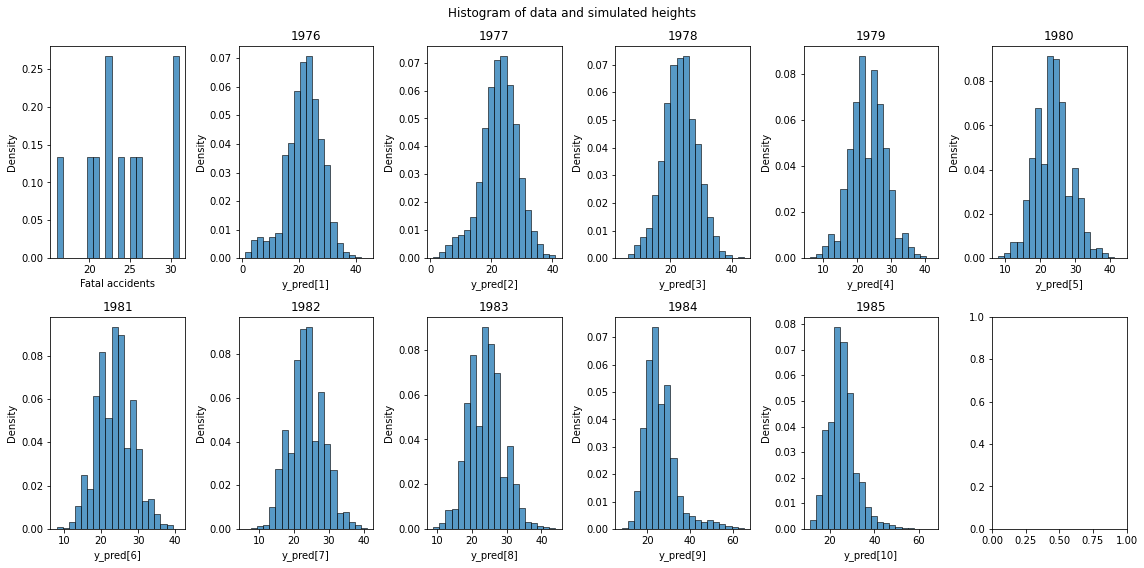

In [54]:
fig, axs = plt.subplots(2,6, figsize=(16,8))
fig.suptitle("Histogram of data and simulated heights")
sns.histplot(data=d, x='Fatal accidents', bins=20, stat="density", ax=axs[0,0])
y = 1
x = 0
for i in range(1,11):
    name = "y_pred[" + str(i) + "]"
    if i == 6:
        x = 1
        y = 0
    sns.histplot(data=samples_df, x=name, bins=20, stat="density", ax=axs[x, y])
    title = d['Year'][i-1]
    axs[x, y].set_title(str(title))
    y += 1
plt.tight_layout()
plt.show()

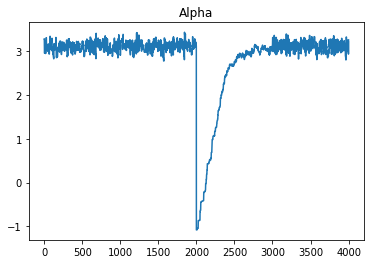

In [55]:
plt.plot(samples_df['alpha'])
plt.title("Alpha")
plt.show()

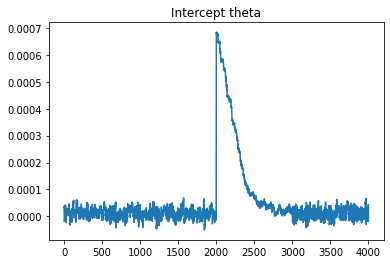

In [56]:
plt.plot(samples_df['theta'])
plt.title("Intercept theta")
plt.show()

In [57]:
for i in range(10):
    accidents = d['Fatal accidents'][i]
    print("Real number of fatal accidents: ", accidents)
    name = "y_pred[" + str(i+1) + "]"
    accident_pred = samples_df[name]
    print("Simulated number of fatal accidents\nmean: ", accident_pred.mean(), " \nstd: ", accident_pred.std(), "\n\n")

Real number of fatal accidents:  24
Simulated number of fatal accidents
mean:  21.82675  
std:  6.177967000281253 


Real number of fatal accidents:  25
Simulated number of fatal accidents
mean:  22.09225  
std:  6.026385257126931 


Real number of fatal accidents:  31
Simulated number of fatal accidents
mean:  22.63375  
std:  5.52908253021299 


Real number of fatal accidents:  31
Simulated number of fatal accidents
mean:  23.003  
std:  5.13255070790268 


Real number of fatal accidents:  22
Simulated number of fatal accidents
mean:  23.524  
std:  5.0027673262135695 


Real number of fatal accidents:  21
Simulated number of fatal accidents
mean:  23.7495  
std:  4.8782885497676025 


Real number of fatal accidents:  26
Simulated number of fatal accidents
mean:  23.50425  
std:  4.857404711636983 


Real number of fatal accidents:  20
Simulated number of fatal accidents
mean:  23.92525  
std:  4.951645396788211 


Real number of fatal accidents:  16
Simulated number of fatal acciden

### Model improvment

In [58]:
model_1_fit = CmdStanModel(stan_file='model_1a_fit.stan')

INFO:cmdstanpy:compiling stan file /home/Lab 5/model_1a_fit.stan to exe file /home/Lab 5/model_1a_fit
INFO:cmdstanpy:compiled model executable: /home/Lab 5/model_1a_fit
--- Translating Stan model to C++ code ---
bin/stanc  --o=/tmp/tmpmurwq7og/tmp6vlnieti.hpp /tmp/tmpmurwq7og/tmp6vlnieti.stan
Warning in '/tmp/tmpmurwq7og/tmp6vlnieti.stan', line 4, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/tmp/tmpmurwq7og/tmp6vlnieti.stan', line 8, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-s

In [59]:
fit=model_1_fit.sample(data=dict(N=len(d),n=d['Miles flown [100 mln miles]'].values,y=d['Fatal accidents'].values), seed=28052020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▍         | 00:00 Status
chain 1 |▉         | 00:01 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |█▎        | 00:03 Iteration:  100 / 2000 [  5%]  (Warmup)

chain 1 |█▊        | 00:04 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:06 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:07 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 1 |███▏      | 00:09 Iteration:  500 / 2000 [ 25%]  (Warmup)

chain 1 |███▋      | 00:11 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:13 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:15 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:16 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:18 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:20 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:22 Iteration: 1200 / 2000 [ 60%]  (


INFO:cmdstanpy:CmdStan done processing.


In [60]:
samples_df = fit.draws_pd()
samples_df

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha[1],alpha[2],alpha[3],...,y_pred[1],y_pred[2],y_pred[3],y_pred[4],y_pred[5],y_pred[6],y_pred[7],y_pred[8],y_pred[9],y_pred[10]
0,5141.82,0.881678,0.001078,10.0,1023.0,0.0,-5137.28,1.05200,0.957062,0.550548,...,20.0,25.0,24.0,19.0,30.0,28.0,27.0,20.0,24.0,17.0
1,5143.55,0.999862,0.001078,10.0,1023.0,0.0,-5140.19,1.05877,0.955451,0.524412,...,20.0,17.0,26.0,22.0,25.0,29.0,24.0,22.0,26.0,20.0
2,5144.44,0.921814,0.001078,10.0,1023.0,0.0,-5132.88,1.18673,0.904830,0.511737,...,23.0,24.0,24.0,23.0,20.0,29.0,23.0,27.0,18.0,22.0
3,5145.23,0.991171,0.001078,10.0,1023.0,0.0,-5141.11,1.13086,0.913165,0.491719,...,21.0,18.0,29.0,25.0,37.0,26.0,30.0,25.0,31.0,16.0
4,5144.17,0.959610,0.001078,10.0,1023.0,0.0,-5141.30,1.13304,0.951442,0.506564,...,17.0,31.0,24.0,24.0,26.0,29.0,31.0,30.0,20.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,5159.47,0.888332,0.001111,10.0,1023.0,0.0,-5154.57,2.05014,1.977410,1.681810,...,21.0,21.0,26.0,25.0,18.0,20.0,21.0,15.0,32.0,16.0
3996,5154.97,0.804619,0.001111,10.0,1023.0,0.0,-5151.21,2.12189,2.010820,1.658670,...,21.0,17.0,20.0,25.0,25.0,18.0,25.0,26.0,27.0,17.0
3997,5156.44,0.911921,0.001111,10.0,1023.0,0.0,-5151.01,2.07433,1.994390,1.670570,...,26.0,22.0,18.0,17.0,23.0,23.0,27.0,22.0,27.0,14.0
3998,5157.59,0.924227,0.001111,10.0,1023.0,0.0,-5151.25,2.01327,1.922210,1.720590,...,24.0,18.0,28.0,22.0,23.0,27.0,21.0,22.0,20.0,25.0


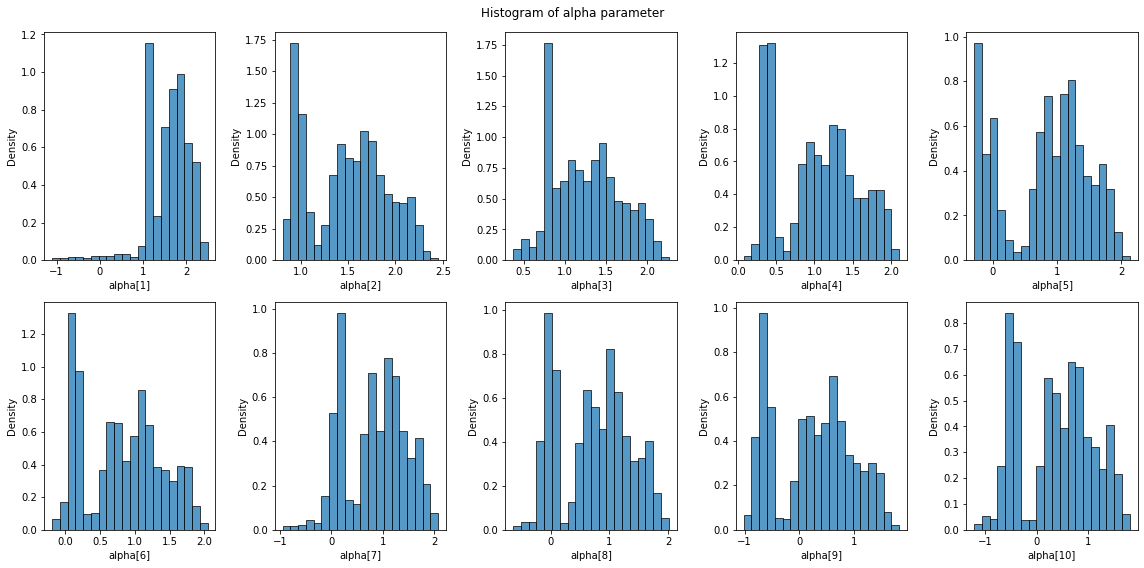

In [61]:
fig, axs = plt.subplots(2,5, figsize=(16,8))
fig.suptitle("Histogram of alpha parameter")
y = 0
x = 0
for i in range(1,11):
    name = "alpha[" + str(i) + "]"
    if i == 6:
        x = 1
        y = 0
    sns.histplot(data=samples_df, x=name, bins=20, stat="density", ax=axs[x, y])
    y += 1
plt.tight_layout()
plt.show()

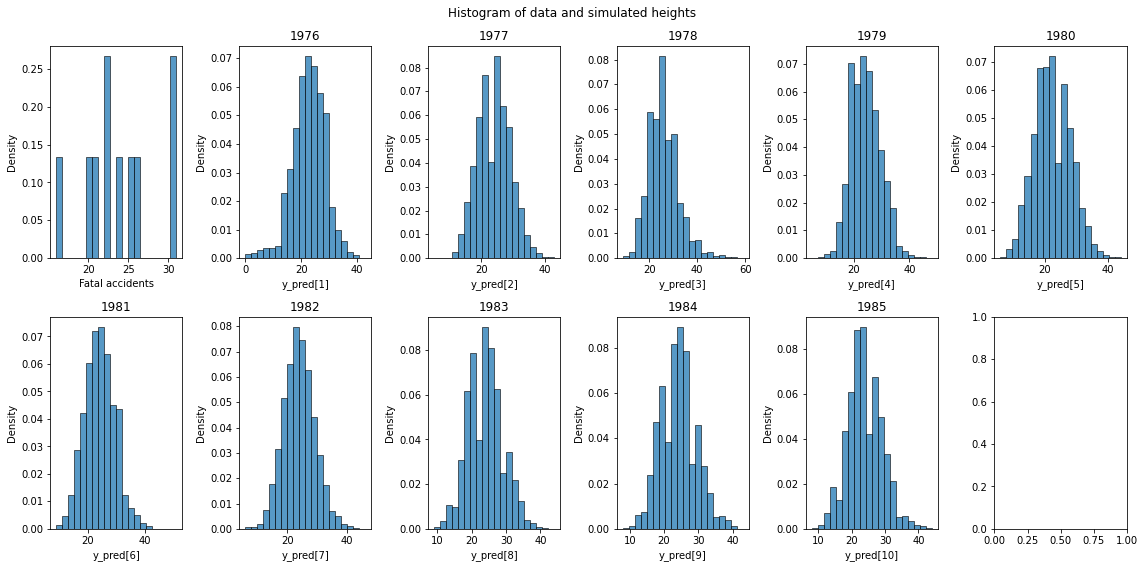

In [62]:
fig, axs = plt.subplots(2,6, figsize=(16,8))
fig.suptitle("Histogram of data and simulated heights")
sns.histplot(data=d, x='Fatal accidents', bins=20, stat="density", ax=axs[0,0])
y = 1
x = 0
for i in range(1,11):
    name = "y_pred[" + str(i) + "]"
    if i == 6:
        x = 1
        y = 0
    sns.histplot(data=samples_df, x=name, bins=20, stat="density", ax=axs[x, y])
    title = d['Year'][i-1]
    axs[x, y].set_title(str(title))
    y += 1
plt.tight_layout()
plt.show()

In [63]:
for i in range(10):
    accidents = d['Fatal accidents'][i]
    print(str(d['Year'][i]))
    print("Real number of fatal accidents: ", accidents)
    name = "y_pred[" + str(i+1) + "]"
    accident_pred = samples_df[name]
    print("Simulated number of fatal accidents\nmean: ", accident_pred.mean(), " \nstd: ", accident_pred.std(), "\n\n")

1976
Real number of fatal accidents:  24
Simulated number of fatal accidents
mean:  22.808  
std:  5.7860613223856 


1977
Real number of fatal accidents:  25
Simulated number of fatal accidents
mean:  23.921  
std:  5.086720719866629 


1978
Real number of fatal accidents:  31
Simulated number of fatal accidents
mean:  25.59775  
std:  6.336480307171387 


1979
Real number of fatal accidents:  31
Simulated number of fatal accidents
mean:  24.203  
std:  5.247539915883651 


1980
Real number of fatal accidents:  22
Simulated number of fatal accidents
mean:  22.2995  
std:  5.615129755450237 


1981
Real number of fatal accidents:  21
Simulated number of fatal accidents
mean:  24.1645  
std:  5.245790629622236 


1982
Real number of fatal accidents:  26
Simulated number of fatal accidents
mean:  23.49975  
std:  5.216013960670493 


1983
Real number of fatal accidents:  20
Simulated number of fatal accidents
mean:  23.7985  
std:  5.097587085918653 


1984
Real number of fatal accidents

My model is not working properly. I tested different sets of parameters, but none of them gave satisfactory results. A solution to this problem may be to scale the miles flown to a scale of 0-1. In such a solution it will be easier to choose theta and alpha parameters.